In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

import numpy as np
import pandas as pd
import networkx as nx

# import OmicsIntegrator as oi

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys

sys.path.append("../src/")
from graph import Graph
from graph import get_robust_subgraph_from_randomizations

In [4]:
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "Arial"

import seaborn as sns

# 0 - Omics Integrator 2 Inputs

In [5]:
interactome_file = "./OI2_pipeline_data/iRefIndex_v14_MIScore_interactome_C9.costs.txt"
prize_file = "./OI2_pipeline_data/protein_TF_prizes.tsv"
output_dir = "./OI2_pipeline_data/"

Ws = [0.5, 1]
Bs = [1, 2]
Gs = [3, 4]

params = {
    "noise": 0.1, 
    "dummy_mode": "terminals", 
    "exclude_terminals": False, 
    "seed": 1
}

graph = Graph(interactome_file, params)
graph.prepare_prizes(prize_file)

04:02:11 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
04:02:11 - OI2: INFO - []
04:02:11 - OI2: INFO - Members of the prize file not present in the interactome:
04:02:11 - OI2: INFO - ['CALM1', 'DCAF1', 'DUX4', 'EPYC', 'FN3K', 'G6PC3', 'GPC6', 'GXYLT2', 'HIST1H3A', 'HIST2H3A', 'LEFTY2', 'NBPF7', 'NDNF', 'TKFC']


In [6]:
node_attributes_df = graph.node_attributes
node_attributes_df.head()

,prize,type,terminal,degree
C9ORF72,4.0,terminal,True,93
ZNF91,0.0,protein,False,6
ACP5,0.0,protein,False,11
SLC27A2,0.0,protein,False,9
PAX9,0.0,protein,False,11


# 1 - Param sweep

Don't worry about this for now. 

# 2 - Randomizations

## 2.1 - Randomization results

In [5]:
robustness_reps = 100
specificity_reps = 100

results = graph.grid_randomization(prize_file, Ws, Bs, Gs, robustness_reps, specificity_reps)

11:47:04 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
11:47:04 - OI2: INFO - []
11:47:04 - OI2: INFO - Members of the prize file not present in the interactome:
11:47:04 - OI2: INFO - ['AK4', 'BTBD17', 'DUX4', 'E2F', 'FABP7', 'GFY', 'GMPR', 'GPC2', 'GXYLT2', 'JPT1', 'MT-ATP6', 'MT-CO3', 'OCT6', 'PCDHGB6', 'PLPP3', 'PRXL2A', 'RBM14', 'TBXT', 'TMEM132B', 'TMEM35A']
11:47:08 - OI2: INFO - Randomizations for W_0.50_B_1.00_G_3.00
11:47:09 - OI2: INFO - Randomizations for W_0.50_B_1.00_G_4.00
11:47:10 - OI2: INFO - Randomizations for W_0.50_B_2.00_G_3.00
11:47:11 - OI2: INFO - Randomizations for W_0.50_B_2.00_G_4.00
11:47:11 - OI2: INFO - Randomizations for W_1.00_B_1.00_G_3.00
11:47:12 - OI2: INFO - Randomizations for W_1.00_B_1.00_G_4.00
11:47:13 - OI2: INFO - Randomizations for W_1.00_B_2.00_G_3.00
11:47:14 - OI2: INFO - Randomizations for W_1.00_B_2.00_G_4.00


Pickle results

In [6]:
with open("../pickles/randomization_results.pkl", "wb") as f: 
    pickle.dump(results, f)

Load results

In [7]:
results = pickle.load(open("./OI2_pipeline_data/randomization_results.pkl", "rb"))

## 2.2 - Generate robust networks

Add robust networks to results dictionary

In [12]:
# for paramstring, forests in results.items(): 
#     forests["robust"] = get_robust_subgraph_from_randomizations(forests["augmented_forest"], 400, 5)

In [13]:
robust_networks = { param:get_robust_subgraph_from_randomizations(forests["augmented_forest"], 400, 5) for param,forests in results.items() }

# Test new funcs

In [9]:

# from graph import generate_basic_statistics

In [14]:
robust_summary = graph.generate_basic_statistics(robust_networks)
robust_summary

,W,B,G,size,min_robustness,mean_robustness,max_specificity,mean_specificity,mean_log_degree,std_log_degree,KS_statistic,euclidean_distance
W_0.50_B_1.00_G_3.00,0.50,1.00,3.00,399,0.23,0.640501,0.75,0.116416,5.478399,1.921619,0.496250,0.377878
W_0.50_B_1.00_G_4.00,0.50,1.00,4.00,400,0.02,0.289325,0.14,0.025250,5.013172,1.416217,0.461917,0.711123
W_0.50_B_2.00_G_3.00,0.50,2.00,3.00,400,0.69,0.955300,0.98,0.123550,4.832091,1.920192,0.380968,0.131388
W_0.50_B_2.00_G_4.00,0.50,2.00,4.00,399,0.24,0.774687,0.38,0.068145,4.928508,1.436792,0.451981,0.235393
W_1.00_B_1.00_G_3.00,1.00,1.00,3.00,400,0.23,0.638000,0.75,0.117800,5.502732,1.909796,0.501914,0.380685
W_1.00_B_1.00_G_4.00,1.00,1.00,4.00,400,0.03,0.285750,0.14,0.024025,5.017132,1.430268,0.466917,0.714654
W_1.00_B_2.00_G_3.00,1.00,2.00,3.00,400,0.74,0.961525,1.00,0.123000,4.765686,1.975827,0.373468,0.128877
W_1.00_B_2.00_G_4.00,1.00,2.00,4.00,400,0.37,0.828575,0.41,0.070325,4.794332,1.755181,0.392439,0.185289


Plot relevant features

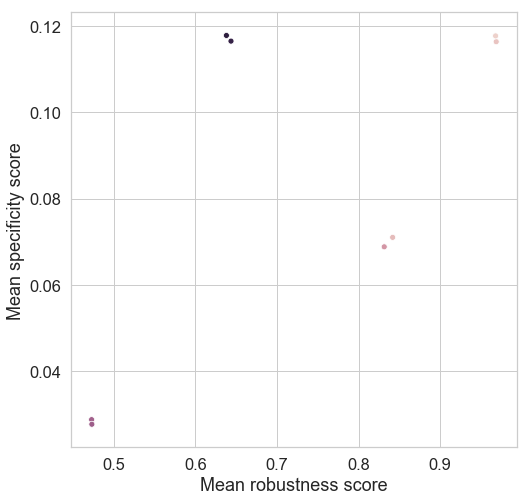

In [21]:
with plt.rc_context(dict(sns.axes_style("whitegrid"), **sns.plotting_context("notebook", font_scale=1.5))):
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    sns.scatterplot(data=robust_summary, x="mean_robustness", y="mean_specificity", hue="mean_log_degree", ax=ax, legend=False)
    
    ax.set(xlabel="Mean robustness score", ylabel="Mean specificity score")